# **Machine Learning Project - Predicting Customer Lifetime Value** 

------



<br>
Authors: Ayesha Naime (356760), Fatima Hussain (350328), Minahil Ashraf (349582)
<br><br>

**Project Objective:** To build a machine learning model that can predict future customer behaviour using the transaction hsitory of repeat customers and calculate their customer lifetime value. This will help the retail companies decide whether acquiring new customers is more profitable or retaining old cutomers. 
<br><br>
**Process Overview**: 


1.   Study, Analyze, and Select the optimal features for Customer Lifetime Value Prediction.
2.   Define an appropriate time frame for Customer Lifetime Value calculation
3.   Calculate lifetime value for training the machine learning model
4.   Build and run the machine learning model
5.   Check if the model is useful
<br><br>
**Data:** The dataset contains information on 54,000 transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based online store. 
Attribute Information:
*   InvoiceNo: nominal - 6-digit unique number for each transaction. 
*   Stockcode: nominal - 5-digit unique number assigned to each product.
*   Description: nominal - Product name.
*   Quantity: numeric - the quantityof each product per transaction.
*   InvoiceDate: numeric - date and time of when each transaction was generated.
*   UnitPrice: numeric - the product price per unit. 
*   CustomerID: nominal - 5-digit integral number uniquely assigned to each customer.
*   Country: nominal - name of country where each customer resides.













Dataset: https://www.kaggle.com/code/shailaja4247/customer-lifetime-value-prediction/data

Refer to: https://medium.com/swlh/predict-customer-lifetime-value-with-machine-learning-545624073d14

## Table of Contents

>[Module 1: Preprocessing, Visualization and Model Selection](#scrollTo=YJ7yfyNKnwlJ)

>>[Data Exploration and Preprocessing](#scrollTo=L2SRjjoK0JUC)

>>[1.1 Load Dataset:](#scrollTo=-UUVbYZbnDq2)

>>[1.2 Missing and Incomplete Data:](#scrollTo=SiFGY22zno9n)

>>[1.3 Analyzing and Correcting Attributes:](#scrollTo=Y_pTB6Eq_sCF)

>>>[1.3.1 Invoice Date](#scrollTo=42a_VBcVAQ3e)

>>>[1.3.2 InvoiceNo](#scrollTo=6eppfdQLnbbA)

>>>[1.3.3   Quantity](#scrollTo=im4eunf3pF7V)

>>>[1.3.4 StockNo](#scrollTo=nMNIjMGqoKKG)

>>>[1.3.5 Description](#scrollTo=ZXkeSz6xoeFp)

>>>[1.3.6 UnitPrice](#scrollTo=Mo1aiO1t7Shr)

>>[1.4 Duplicate Removal](#scrollTo=QNe_h5_78TKa)

>>[Feature Engineering and Selection](#scrollTo=WIDuQBlM9ZuP)

>>[2.1 Feature Creation: Sales](#scrollTo=z18N5JDo4ytB)

>>[2.2 Summarizing Each Customer's Information](#scrollTo=26nMQLFZB9C_)

>>>[2.2.1 Data Selection: Repeat Customers](#scrollTo=lLA6hbe6DCZe)

>>[2.3 Data Preperation](#scrollTo=wcRMRp9PTs-F)

>>>[2.3.1 Dataset Creation for Model Training](#scrollTo=6I9LxVq7l-uI)

>>[Model Selection](#scrollTo=NOMH8DHCWix7)

>>[3.1 Linear Regression Model](#scrollTo=CG_qcSbx7SGI)

>>[3.2 Single Layer Neural Network:](#scrollTo=-ozNUNJk70aV)

>[Module 2: Optimization](#scrollTo=M0ym1gULcKiX)

>>[Multilayer Neural Network](#scrollTo=E56LBBXyfbea)

>>[4.1 Model 1.0: Baseline](#scrollTo=6vWmbLEBdEFk)

>>[4.2 MODEL 2.0: Model Architecture](#scrollTo=P79ZlhGCeNsh)

>>[4.3 MODEL 3.0: Testing Optimizer](#scrollTo=_h3XQn2bvQuC)

>>[4.4 Model 4.0: Feature Engineering](#scrollTo=2wJlMEPbwiiB)

>>[Save Model](#scrollTo=JrawPq4B6co7)

>>[Conclusion](#scrollTo=I_jYgUr15yVu)

>>>[Scatterplot](#scrollTo=oT9QBehG8DBw)

>>>[Summary](#scrollTo=ggkisfYX8n7c)



# Module 1: Preprocessing, Visualization and Model Selection
**Module Objective**: This module is responsible for preparing the data for machine learning, visualizing the data, and selecting the best model for the given task. The module is designed to take raw data as input and output a preprocessed dataset, along with visualizations and select a machine learning model that can be used for prediction.

The module contains the following submodules:


1.   Data Exploration and Preprocessing: the data is explored using descriptions and visualizations. Null values, negative values, and duplicate values are handled.
1.   Feature Engineering and Selection: in this submodule the preprocessed data is transformed to make it suitable for use in machine learning algorithms by transforming and creating new appropriate features.
2.   Model Selection: in this submodule we select the most suitable machine learning model for this problem.

---

## 1. **Data Exploration and Preprocessing**







## 1.1 Load Dataset:


In [1]:
!wget 'http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx'

--2023-05-18 15:10:54--  http://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23715344 (23M) [application/x-httpd-php]
Saving to: ‘Online Retail.xlsx’

Online Retail.xlsx  100%[===================>]  22.62M  29.7MB/s    in 0.8s    

2023-05-18 15:10:55 (29.7 MB/s) - ‘Online Retail.xlsx’ saved [23715344/23715344]



Please refresh your colab files after downloading the dataset.

In [2]:
# imports
# helper libraries
import pandas as pd
import numpy as np
# for visualizations
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
#  for model selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# load dataset
df = pd.read_excel("Online Retail.xlsx", sheet_name='Online Retail')

# display dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
print("Number of instances: ", df.shape[0])

Number of instances:  541909


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Observation**: Quantity and UnitPrice have negative values. This may be due to returning products after a purchase. We deal with these in the preprocessing section.

## 1.2 Missing and Incomplete Data:

In [6]:
# display each column's info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
# display null vallues in each column
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
# drop rows with null customer id
df1 = df.dropna(subset=['CustomerID'])

In [9]:
df1.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
print("Number of instances after before null values: ", df.shape[0])
print("Number of instances after removing null values: ", df1.shape[0])

Number of instances after before null values:  541909
Number of instances after removing null values:  406829


All null values have been removed. 

## 1.3 Analyzing and Correcting Attributes:

### 1.3.1 Invoice Date

In [11]:
# last month data is incomplete, therefore will be excluded
df2 = df1[df1.InvoiceDate<'2011-12-01 00:00:00']

print("Before removing last month's data:\t", len(df1))
print("After removing last month's data:\t", len(df2))

Before removing last month's data:	 406829
After removing last month's data:	 389168


In [12]:
df2.InvoiceDate.max()

Timestamp('2011-11-30 17:42:00')

### 1.3.2 InvoiceNo

In [13]:
# get all the cancelled invoices 
cancelled_invoices_mask = df2['InvoiceNo'].astype(str).str.startswith('C')
cancelled_invoices = df2[cancelled_invoices_mask]

In [14]:
print("Number of cancelled invoices ", len(cancelled_invoices))

Number of cancelled invoices  8548


In [15]:
cancelled_invoices.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


Maximum quantity in cancelled invoices -1
Minimum quantity in cancelled invoices -74215



Text(0, 0.5, 'quantity')

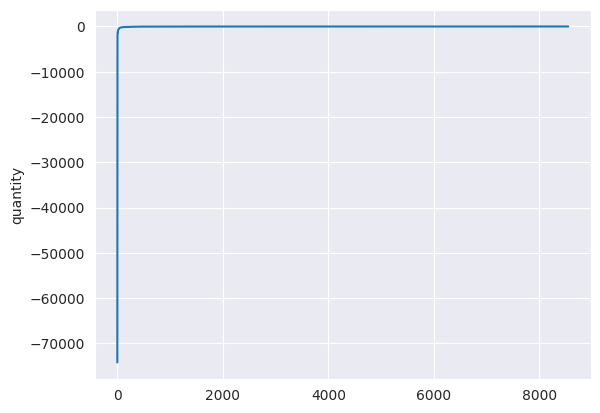

In [16]:
sns.set_style('darkgrid')
# display the quantity in cancelled_invoices
cancelled_invoices_sorted = np.sort(cancelled_invoices['Quantity'])

# print min and max values
print(f"Maximum quantity in cancelled invoices {cancelled_invoices_sorted[-1]}")
print(f"Minimum quantity in cancelled invoices {cancelled_invoices_sorted[0]}\n")

# plot the values
plt.plot(cancelled_invoices_sorted)
plt.ylabel("quantity")

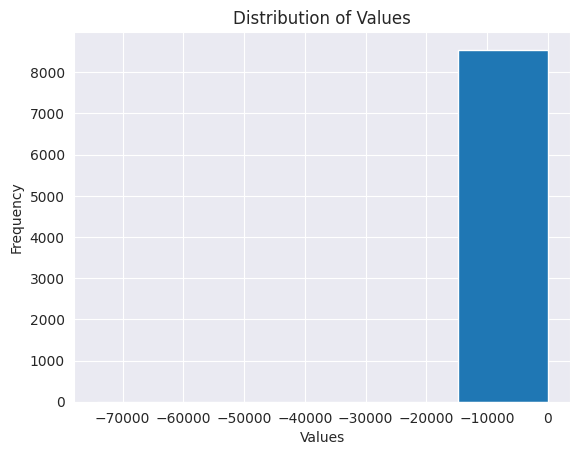

In [17]:
# use the histogram() function to create a distribution curve
hist, bin_edges = np.histogram(cancelled_invoices_sorted, bins=5)

# plot the histogram using matplotlib
plt.hist(cancelled_invoices_sorted, bins=5)

# add labels and title to the plot
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Distribution of Values')

# show the plot
plt.show()

**Observation**: We can see that the quantity in the cancelled invoices is negative, therefore, we will remove these values

### 1.3.3   Quantity

In [18]:
# check the values of quantity
print(np.sort(df2.Quantity.unique())[:5])
print(np.sort(df2.Quantity.unique())[-5:])

[-74215  -9360  -3114  -2000  -1930]
[ 3906  4300  4800 12540 74215]


<ipython-input-19-ca51189aa8ea>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-darkgrid')


Text(0, 0.5, 'Quantity')

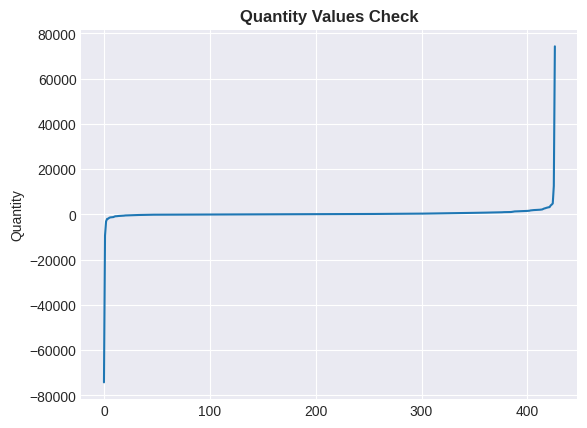

In [19]:
%matplotlib inline
# plot the values of quantity to check for negative values
style.use('seaborn-darkgrid')
plt.plot(np.sort(df2.Quantity.unique()))
plt.title('Quantity Values Check', fontweight='bold')
plt.ylabel('Quantity')

In [20]:
# since quantity values shouldnt be less than 0, we will drop all the rows with negative quantity
df3 = df2[df2.Quantity>=0]

Text(0, 0.5, 'Quantity')

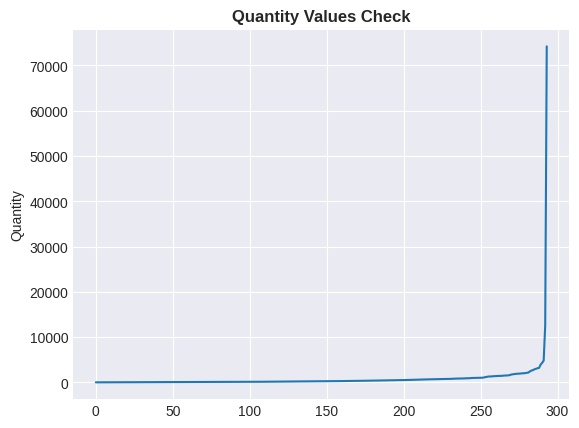

In [21]:
# plot again to check
plt.plot(np.sort(df3.Quantity.unique()))
plt.title('Quantity Values Check', fontweight='bold')
plt.ylabel('Quantity')

### 1.3.4 StockNo

In [22]:
# get unique stock code values 
stock_unique = df3.StockCode.unique()
print(f"Unique values of stock code : ", stock_unique)
print(f"Number of unique values: {len(stock_unique)}") # 3684 unique items

df2.StockCode.value_counts()

Unique values of stock code :  ['85123A' 71053 '84406B' ... 23576 23562 23561]
Number of unique values: 3657


85123A    2017
22423     1853
85099B    1616
47566     1398
84879     1376
          ... 
17001        1
90214Y       1
47579        1
20964        1
84613C       1
Name: StockCode, Length: 3676, dtype: int64

### 1.3.5 Description

In [23]:
# get the number of unique description values
description_unique = df3.Description.unique()
print(f"Unique values of description : {description_unique}\n")
print(f"Number of unique values: {len(description_unique)}\n") # 3684 unique items

df3.Description.value_counts()

Unique values of description : ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' ... 'GIN AND TONIC DIET METAL SIGN'
 'SET OF 6 RIBBONS PARTY' 'SILVER AND BLACK ORBIT NECKLACE']

Number of unique values: 3868



WHITE HANGING HEART T-LIGHT HOLDER    1976
REGENCY CAKESTAND 3 TIER              1676
JUMBO BAG RED RETROSPOT               1576
PARTY BUNTING                         1379
ASSORTED COLOUR BIRD ORNAMENT         1366
                                      ... 
LETTER "Y" BLING KEY RING                1
PEARL & SHELL 42"NECKL. IVORY            1
ZINC PLANT POT HOLDER                    1
FIRE POLISHED GLASS BRACELET RED         1
SILVER AND BLACK ORBIT NECKLACE          1
Name: Description, Length: 3868, dtype: int64

In [24]:
print(f"{len(description_unique) - len(stock_unique)} more descriptions than stock code")

211 more descriptions than stock code


In [25]:
# checking the number of items sold for each type of item
grouped = df3.groupby(['StockCode', 'Description']).size().reset_index(name='count')
grouped

,StockCode,Description,count
0,10002,INFLATABLE POLITICAL GLOBE,49
1,10080,GROOVY CACTUS INFLATABLE,21
2,10120,DOGGY RUBBER,29
3,10125,MINI FUNKY DESIGN TAPES,62
4,10133,COLOURING PENCILS BROWN TUBE,124
...,...,...,...
3883,C2,CARRIAGE,130
3884,DOT,DOTCOM POSTAGE,15
3885,M,Manual,282
3886,PADS,PADS TO MATCH ALL CUSHIONS,4


Feature and Description will be removed later on because they are irrelevant for training the model.

### 1.3.6 UnitPrice

In [26]:
# repeat for the unitPrice
# see unique values in UnitPrice to check for 0 or negative values
print(np.sort(df3.UnitPrice.unique())[:5])
print(np.sort(df3.UnitPrice.unique())[-5:])

[0.    0.001 0.04  0.06  0.07 ]
[2500.   3155.95 3949.32 4161.06 8142.75]


Text(0, 0.5, 'UnitPrice')

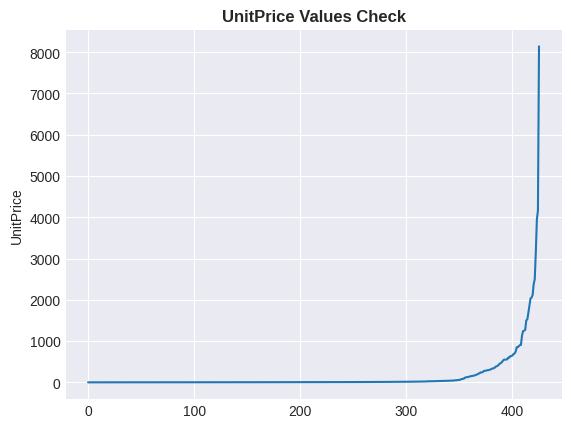

In [27]:
# plot the unique values of UnitPrice
plt.plot(np.sort(df3.UnitPrice.unique()))
plt.title('UnitPrice Values Check', fontweight='bold')
plt.ylabel('UnitPrice')

In [28]:
# remove items with UnitPrice <= 0 
df4 = df3[df3.UnitPrice>0]

In [29]:
df4.describe()

,Quantity,UnitPrice,CustomerID
count,380580.000000,380580.000000,380580.000000
mean,12.823582,3.134235,15293.531778
std,127.733673,22.430764,1712.593737
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16793.000000
max,74215.000000,8142.750000,18287.000000


**Observation**: Hence we can see Quantity and UnitPrice no longer have any negative values.

## 1.4 Duplicate Removal

In [30]:
# remove duplicate values
duplicates = df4[df4.duplicated(subset=['InvoiceNo', 'CustomerID','StockCode','UnitPrice', 'InvoiceDate','Country', 'Description'], keep=False)]

In [31]:
# rows with all duplicated attributes except Quantity should have their Quantity summed
duplicates.sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
113,536381,71270,PHOTO CLIP LINE,1,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
514589,579711,22577,WOODEN HEART CHRISTMAS SCANDINAVIAN,3,2011-11-30 14:17:00,0.29,15060.0,United Kingdom
516295,579885,47578A,ENGLISH ROSE SMALL SCENTED FLOWER,1,2011-11-30 17:37:00,0.85,15444.0,United Kingdom
516235,579885,22260,FELT EGG COSY BLUE RABBIT,1,2011-11-30 17:37:00,0.85,15444.0,United Kingdom
516281,579885,22260,FELT EGG COSY BLUE RABBIT,10,2011-11-30 17:37:00,0.85,15444.0,United Kingdom


In [32]:
# sum the rows
df5 = df4.groupby(['InvoiceNo', 'CustomerID','StockCode','UnitPrice', 'InvoiceDate','Country', 'Description'])['Quantity'].agg(lambda x: sum(set(x)))

In [33]:
df5 = df5.reset_index()
df5

,InvoiceNo,CustomerID,StockCode,UnitPrice,InvoiceDate,Country,Description,Quantity
0,536365,17850.0,21730,4.25,2010-12-01 08:26:00,United Kingdom,GLASS STAR FROSTED T-LIGHT HOLDER,6
1,536365,17850.0,22752,7.65,2010-12-01 08:26:00,United Kingdom,SET 7 BABUSHKA NESTING BOXES,2
2,536365,17850.0,71053,3.39,2010-12-01 08:26:00,United Kingdom,WHITE METAL LANTERN,6
3,536365,17850.0,84029E,3.39,2010-12-01 08:26:00,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6
4,536365,17850.0,84029G,3.39,2010-12-01 08:26:00,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6
...,...,...,...,...,...,...,...,...
371258,579885,15444.0,85123A,2.95,2011-11-30 17:37:00,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,1
371259,579885,15444.0,85159A,1.95,2011-11-30 17:37:00,United Kingdom,"BLACK TEA,COFFEE,SUGAR JARS",1
371260,579885,15444.0,85168B,9.95,2011-11-30 17:37:00,United Kingdom,BLACK BAROQUE CARRIAGE CLOCK,1
371261,579885,15444.0,85185B,2.95,2011-11-30 17:37:00,United Kingdom,PINK HORSE SOCK PUPPET KIT,2


In [34]:
# check if rows with only different quantity values have been summed or not 
df5.groupby(['CustomerID', 'InvoiceNo','StockCode','UnitPrice', 'InvoiceDate','Country', 'Description'])['Quantity'].count()

CustomerID  InvoiceNo  StockCode  UnitPrice  InvoiceDate          Country         Description                        
12346.0     541431     23166      1.04       2011-01-18 10:01:00  United Kingdom  MEDIUM CERAMIC TOP STORAGE JAR         1
12347.0     537626     20780      4.65       2010-12-07 14:57:00  Iceland         BLACK EAR MUFF HEADPHONES              1
                       20782      5.49       2010-12-07 14:57:00  Iceland         CAMOUFLAGE EAR MUFF HEADPHONES         1
                       21064      5.95       2010-12-07 14:57:00  Iceland         BOOM BOX SPEAKER BOYS                  1
                       21171      1.45       2010-12-07 14:57:00  Iceland         BATHROOM METAL SIGN                    1
                                                                                                                        ..
18287.0     570715     85039A     1.45       2011-10-12 10:23:00  United Kingdom  SET/4 RED MINI ROSE CANDLE IN BOWL     1
                     

## 2. **Feature Engineering and Selection**

## 2.1 Feature Creation: Sales

In [35]:
# calculate the total sales 
df5['Sales'] = df5['Quantity'] * df5['UnitPrice'] 

In [36]:
# Check the number of purchases from each customer
df5.groupby(['CustomerID']).InvoiceNo.size()

CustomerID
12346.0      1
12347.0    171
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0      7
18283.0    639
18287.0     69
Name: InvoiceNo, Length: 4297, dtype: int64

In [37]:
len(df5.CustomerID.unique())

4297

In [38]:
# create dataframe to check the total amount in each invoice
df_orders = df5.groupby(['CustomerID',
                        'InvoiceNo']).agg({'Sales': sum,
                                           'InvoiceDate': max})
df_orders

Sales         InvoiceDate
CustomerID InvoiceNo                              
12346.0    541431     77183.60 2011-01-18 10:01:00
12347.0    537626       711.79 2010-12-07 14:57:00
           542237       475.39 2011-01-26 14:30:00
           549222       636.25 2011-04-07 10:43:00
           556201       382.52 2011-06-09 13:01:00
...                        ...                 ...
18283.0    578262       307.05 2011-11-23 13:27:00
           579673       220.31 2011-11-30 12:59:00
18287.0    554065       765.28 2011-05-22 10:39:00
           570715      1001.32 2011-10-12 10:23:00
           573167        70.68 2011-10-28 09:29:00

[17754 rows x 2 columns]

**Observation**: this shows that customer 12346 shopped only once with a total of 77183.60 while customer 12347 shopped multiple times.
<br> Below is a plot showing the distribution of sales and any outliers. 

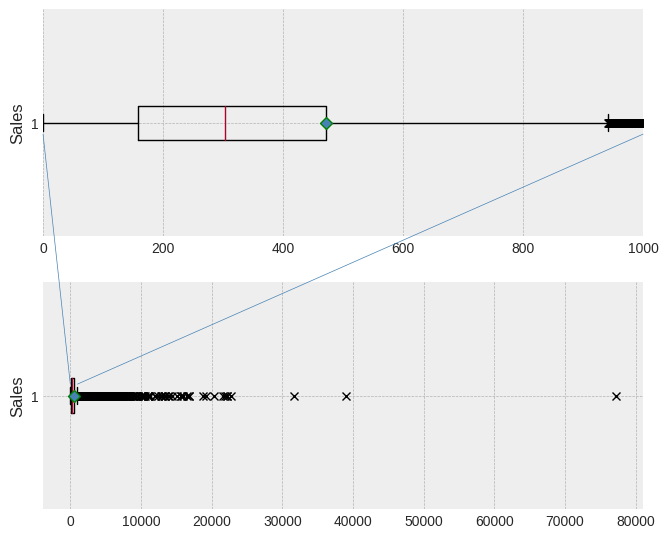

In [39]:
# plotting a box plot to check for ouliers in sales
from matplotlib.patches import ConnectionPatch
# for plotting outliers and mean 
red_circle = dict(markerfacecolor='red', marker='x')
mean_shape = dict(markerfacecolor='steelblue', marker='D', markeredgecolor='green')

style.use('bmh')
fig = plt.figure(figsize=(6, 5))
plt.subplots_adjust(bottom = 0., left = 0, top = 1, right = 1)

# Create first axes, the top-left plot with green plot
sub1 = fig.add_subplot(2,1,1) 
sub1.boxplot(x=df_orders['Sales'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape)
sub1.set_xlim(0, 1000)
sub1.set_ylabel('Sales')

# Create second axes, the top-left plot with orange plot
sub2 = fig.add_subplot(2,1,2)
sub2.boxplot(x=df_orders['Sales'], vert=False, flierprops=red_circle, showmeans=True, meanprops=mean_shape)
sub2.set_ylabel('Sales')


con1 = ConnectionPatch(xyA=(0, 0.95), coordsA=sub1.transData, 
                       xyB=(0, 1.05), coordsB=sub2.transData, color = 'steelblue')
fig.add_artist(con1)

con2 = ConnectionPatch(xyA=(1000, 0.95), coordsA=sub1.transData, 
                       xyB=(1000, 1.05), coordsB=sub2.transData, color = 'steelblue')
fig.add_artist(con2)

## 2.2 Summarizing Each Customer's Information

In [40]:
# estimating the frequency, recency, and 
# total amount of purchases by each customer

def groupby_mean(x):
    return x.mean()

def groupby_count(x):
    return x.count()

def purchase_duration(x):
    return (x.max() - x.min()).days

def avg_frequency(x):
    return (x.max() - x.min()).days / x.count()

In [41]:
groupby_mean.__name__ = 'avg'
groupby_count.__name__ = 'count'
purchase_duration.__name__ = 'purchase_duration'
avg_frequency.__name__ = 'purchase_frequency'

In [42]:
df_orders.reset_index()

,CustomerID,InvoiceNo,Sales,InvoiceDate
0,12346.0,541431,77183.60,2011-01-18 10:01:00
1,12347.0,537626,711.79,2010-12-07 14:57:00
2,12347.0,542237,475.39,2011-01-26 14:30:00
3,12347.0,549222,636.25,2011-04-07 10:43:00
4,12347.0,556201,382.52,2011-06-09 13:01:00
...,...,...,...,...
17749,18283.0,578262,307.05,2011-11-23 13:27:00
17750,18283.0,579673,220.31,2011-11-30 12:59:00
17751,18287.0,554065,765.28,2011-05-22 10:39:00
17752,18287.0,570715,1001.32,2011-10-12 10:23:00


In [43]:
# basic information about each customers purchases 
df_summary = df_orders.reset_index().groupby('CustomerID').agg({
            'Sales': [min, max, sum, groupby_mean, groupby_count],
            'InvoiceDate': [min, max, purchase_duration, avg_frequency]})
df_summary

Sales                                          \
                 min       max       sum           avg count   
CustomerID                                                     
12346.0     77183.60  77183.60  77183.60  77183.600000     1   
12347.0       382.52   1294.32   4085.18    680.863333     6   
12348.0       227.44    892.80   1797.24    449.310000     4   
12349.0      1757.55   1757.55   1757.55   1757.550000     1   
12350.0       334.40    334.40    334.40    334.400000     1   
...              ...       ...       ...           ...   ...   
18280.0       180.60    180.60    180.60    180.600000     1   
18281.0        80.82     80.82     80.82     80.820000     1   
18282.0       100.21    100.21    100.21    100.210000     1   
18283.0         1.95    307.05   1837.53    122.502000    15   
18287.0        70.68   1001.32   1837.28    612.426667     3   

                   InvoiceDate                                        \
                           min                 max purchase_duration   
CustomerID                                                             
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00                 0   
12347.0    2010-12-07 14:57:00 2011-10-31 12:25:00               327   
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00               282   
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00                 0   
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00                 0   
...                        ...                 ...               ...   
18280.0    2011-03-07 09:52:00 2011-03-07 09:52:00                 0   
18281.0    2011-06-12 10:53:00 2011-06-12 10:53:00                 0   
18282.0    2011-08-05 13:35:00 2011-08-05 13:35:00                 0   
18283.0    2011-01-06 14:14:00 2011-11-30 12:59:00               327   
18287.0    2011-05-22 10:39:00 2011-10-28 09:29:00               158   

                               
           purchase_frequency  
CustomerID                     
12346.0              0.000000  
12347.0             54.500000  
12348.0             70.500000  
12349.0              0.000000  
12350.0              0.000000  
...                       ...  
18280.0              0.000000  
18281.0              0.000000  
18282.0              0.000000  
18283.0             21.800000  
18287.0             52.666667  

[4297 rows x 9 columns]

In [44]:
df_summary.columns

MultiIndex([(      'Sales',                'min'),
            (      'Sales',                'max'),
            (      'Sales',                'sum'),
            (      'Sales',                'avg'),
            (      'Sales',              'count'),
            ('InvoiceDate',                'min'),
            ('InvoiceDate',                'max'),
            ('InvoiceDate',  'purchase_duration'),
            ('InvoiceDate', 'purchase_frequency')],
           )

In [45]:
# combine the upper headings with the lower ones
df_summary.columns = ['_'.join(col).lower() for col in df_summary.columns]
# keep only the repeat customers
df_summary = df_summary.loc[df_summary['invoicedate_purchase_duration'] > 0]

In [46]:
df_summary

,sales_min,sales_max,sales_sum,sales_avg,sales_count,invoicedate_min,invoicedate_max,invoicedate_purchase_duration,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12347.0,382.52,1294.32,4085.18,680.863333,6,2010-12-07 14:57:00,2011-10-31 12:25:00,327,54.500000
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12352.0,120.33,840.30,2506.04,313.255000,8,2011-02-16 12:33:00,2011-11-03 14:37:00,260,32.500000
12356.0,58.35,2271.62,2811.43,937.143333,3,2011-01-18 09:50:00,2011-11-17 08:40:00,302,100.666667
12359.0,547.50,2814.30,6310.03,1577.507500,4,2011-01-12 12:43:00,2011-10-13 12:47:00,274,68.500000
...,...,...,...,...,...,...,...,...,...
18270.0,111.95,171.20,283.15,141.575000,2,2011-03-18 12:41:00,2011-11-01 13:57:00,228,114.000000
18272.0,340.72,753.66,2710.70,542.140000,5,2011-04-07 09:35:00,2011-10-25 11:52:00,201,40.200000
18273.0,51.00,102.00,153.00,76.500000,2,2011-03-27 11:22:00,2011-09-05 11:27:00,162,81.000000


### 2.2.1 Data Selection: Repeat Customers

<ipython-input-47-0ebe9a0e8491>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-ticks')


Text(0.5, 0, 'Sales Count')

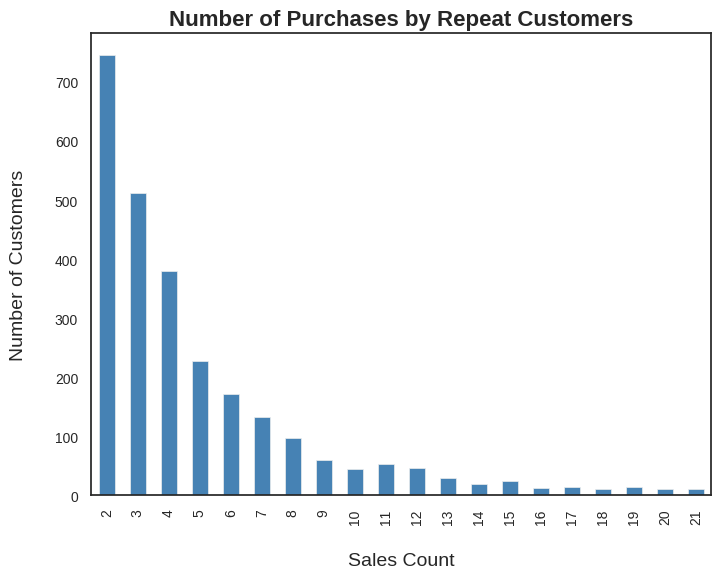

In [47]:
# plot the number of purchases made by repeat customers
purchases = df_summary.groupby('sales_count').count()['sales_avg'][:20]
style.use('seaborn-ticks')


fig, ax = plt.subplots(figsize=(8, 6))

ax = purchases.plot(kind='bar', color='steelblue', grid=False)
plt.title('Number of Purchases by Repeat Customers', fontsize='16', fontweight='bold')
plt.ylabel('Number of Customers', fontsize='14', labelpad=20)
plt.xlabel('Sales Count', fontsize='14', labelpad=20)

**Observation**: mostly repeat customers make atleast 2 purchases, and upto almost 12 purchases.

Text(0.5, 0, 'Avg Number of Days between Purchases')

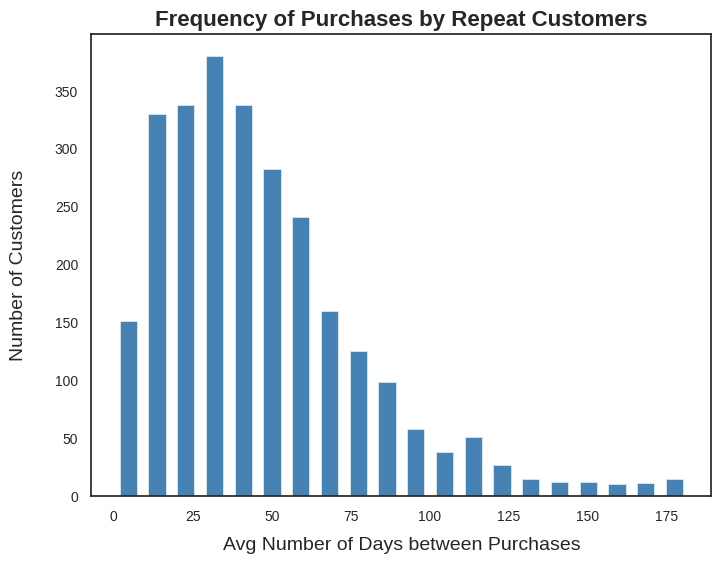

In [48]:
# plot the frequency of purchases by repeat customers
frequency = df_summary['invoicedate_purchase_frequency']
fig, ax = plt.subplots(figsize=(8, 6))

ax = frequency.hist(bins=20, rwidth=0.6, color='steelblue', grid=False)
plt.title('Frequency of Purchases by Repeat Customers', fontsize='16', fontweight='bold')
plt.ylabel('Number of Customers', fontsize='14', labelpad=20)
plt.xlabel('Avg Number of Days between Purchases', fontsize='14', labelpad=10)

**Observation**: Repeat purchases are generally made between 5 to 75 days, and most of them occuring within 12 to 50 days. Therefore the timeframe we will use for our prediction will be 3-months i.e., the data will be split into groups of 3-months. However, we will test whether 1-month, 2-month or 3-month intervals give more accurate redictions.

## 2.3 Data Preperation

In [49]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 17754 entries, (12346.0, 541431) to (18287.0, 573167)
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Sales        17754 non-null  float64       
 1   InvoiceDate  17754 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 519.1 KB


In [50]:
print(f"The earliest invoice date is: {df_orders.InvoiceDate.min()}")
print(f"The latest invoice date is: {df_orders.InvoiceDate.max()}")

The earliest invoice date is: 2010-12-01 08:26:00
The latest invoice date is: 2011-11-30 17:37:00


Hence the dataset contains purchase data for 12 months.

### 2.3.1 Dataset Creation for Model Training 
The new data set will contain only necessary and aggregate columns to train the model.

In [51]:
# group by CustomerID and InvoiceNo so we know how many invoices each customer has
# the sale of the invoice will be totalled
# and max time of the invoice will be used
customer_invoice = df_orders.groupby(['CustomerID','InvoiceNo']).agg({'Sales': [sum],'InvoiceDate':max}).reset_index()

customer_invoice

,CustomerID,InvoiceNo,Sales,InvoiceDate
,,,sum,max
0,12346.0,541431,77183.60,2011-01-18 10:01:00
1,12347.0,537626,711.79,2010-12-07 14:57:00
2,12347.0,542237,475.39,2011-01-26 14:30:00
3,12347.0,549222,636.25,2011-04-07 10:43:00
4,12347.0,556201,382.52,2011-06-09 13:01:00
...,...,...,...,...
17749,18283.0,578262,307.05,2011-11-23 13:27:00
17750,18283.0,579673,220.31,2011-11-30 12:59:00
17751,18287.0,554065,765.28,2011-05-22 10:39:00


In [52]:
# rename columns for better understanding
customer_invoice.columns = ['customer','invoice','sales_sum','invoice_month']

customer_invoice

,customer,invoice,sales_sum,invoice_month
0,12346.0,541431,77183.60,2011-01-18 10:01:00
1,12347.0,537626,711.79,2010-12-07 14:57:00
2,12347.0,542237,475.39,2011-01-26 14:30:00
3,12347.0,549222,636.25,2011-04-07 10:43:00
4,12347.0,556201,382.52,2011-06-09 13:01:00
...,...,...,...,...
17749,18283.0,578262,307.05,2011-11-23 13:27:00
17750,18283.0,579673,220.31,2011-11-30 12:59:00
17751,18287.0,554065,765.28,2011-05-22 10:39:00
17752,18287.0,570715,1001.32,2011-10-12 10:23:00


In [53]:
# instead of date, we want to know the month of the purchase
# Dec 2010 will be considered the first month, while Nov 2011 as the twelvth month
customer_invoice['invoice_month'] = (customer_invoice.invoice_month.dt.month % 12)+1

customer_invoice

,customer,invoice,sales_sum,invoice_month
0,12346.0,541431,77183.60,2
1,12347.0,537626,711.79,1
2,12347.0,542237,475.39,2
3,12347.0,549222,636.25,5
4,12347.0,556201,382.52,7
...,...,...,...,...
17749,18283.0,578262,307.05,12
17750,18283.0,579673,220.31,12
17751,18287.0,554065,765.28,6
17752,18287.0,570715,1001.32,11


In [54]:
# groupby the customer and month of the invoice
customer_invoice_month = customer_invoice.groupby(['customer','invoice_month']).agg({'sales_sum': [sum,groupby_mean,groupby_count]}).reset_index()

customer_invoice_month

customer invoice_month sales_sum                  
                                   sum         avg count
0      12346.0             2  77183.60  77183.6000     1
1      12347.0             1    711.79    711.7900     1
2      12347.0             2    475.39    475.3900     1
3      12347.0             5    636.25    636.2500     1
4      12347.0             7    382.52    382.5200     1
...        ...           ...       ...         ...   ...
12434  18283.0            10    134.90    134.9000     1
12435  18283.0            11    112.99    112.9900     1
12436  18283.0            12    637.71    159.4275     4
12437  18287.0             6    765.28    765.2800     1
12438  18287.0            11   1072.00    536.0000     2

[12439 rows x 5 columns]

In [55]:
# rename columns for better understanding
customer_invoice_month.columns = ['customer','month','sales_sum','sales_avg','sales_count']

customer_invoice_month


,customer,month,sales_sum,sales_avg,sales_count
0,12346.0,2,77183.60,77183.6000,1
1,12347.0,1,711.79,711.7900,1
2,12347.0,2,475.39,475.3900,1
3,12347.0,5,636.25,636.2500,1
4,12347.0,7,382.52,382.5200,1
...,...,...,...,...,...
12434,18283.0,10,134.90,134.9000,1
12435,18283.0,11,112.99,112.9900,1
12436,18283.0,12,637.71,159.4275,4
12437,18287.0,6,765.28,765.2800,1


In [56]:
# each month will be put in a month_group,
# month 1,2,3 in first interval
# month 4,5,6 in second interval
# and so on
customer_invoice_month['month_group'] = pd.cut(customer_invoice_month['month'], bins=[0,3,6,9,12], labels=['group1', 'group2', 'group3', 'group4'])

customer_invoice_month

,customer,month,sales_sum,sales_avg,sales_count,month_group
0,12346.0,2,77183.60,77183.6000,1,group1
1,12347.0,1,711.79,711.7900,1,group1
2,12347.0,2,475.39,475.3900,1,group1
3,12347.0,5,636.25,636.2500,1,group2
4,12347.0,7,382.52,382.5200,1,group3
...,...,...,...,...,...,...
12434,18283.0,10,134.90,134.9000,1,group4
12435,18283.0,11,112.99,112.9900,1,group4
12436,18283.0,12,637.71,159.4275,4,group4
12437,18287.0,6,765.28,765.2800,1,group2


In [57]:
# create pivot table
pivot_df = customer_invoice_month.pivot_table(index='customer', columns='month_group',
                          values=['sales_sum', 'sales_avg','sales_count'], aggfunc={'sales_sum':'sum','sales_count':'sum','sales_avg':'mean'})

pivot_df

sales_avg                              sales_count         \
month_group      group1  group2    group3     group4      group1 group2   
customer                                                                  
12346.0      77183.6000     NaN       NaN        NaN           1      0   
12347.0        593.5900  636.25  483.7150  1294.3200           2      1   
12348.0        560.1200  367.00       NaN   310.0000           2      1   
12349.0             NaN     NaN       NaN  1757.5500           0      0   
12350.0        334.4000     NaN       NaN        NaN           1      0   
...                 ...     ...       ...        ...         ...    ...   
18280.0             NaN  180.60       NaN        NaN           0      1   
18281.0             NaN     NaN   80.8200        NaN           0      0   
18282.0             NaN     NaN  100.2100        NaN           0      0   
18283.0        103.9125  100.41  109.1025   135.7725           3      2   
18287.0             NaN  765.28       NaN   536.0000           0      1   

                          sales_sum                           
month_group group3 group4    group1  group2  group3   group4  
customer                                                      
12346.0          0      0  77183.60    0.00    0.00     0.00  
12347.0          2      1   1187.18  636.25  967.43  1294.32  
12348.0          0      1   1120.24  367.00    0.00   310.00  
12349.0          0      1      0.00    0.00    0.00  1757.55  
12350.0          0      0    334.40    0.00    0.00     0.00  
...            ...    ...       ...     ...     ...      ...  
18280.0          0      0      0.00  180.60    0.00     0.00  
18281.0          1      0      0.00    0.00   80.82     0.00  
18282.0          1      0      0.00    0.00  100.21     0.00  
18283.0          4      6    314.70  200.82  436.41   885.60  
18287.0          0      2      0.00  765.28    0.00  1072.00  

[4297 rows x 12 columns]

In [58]:
# fill null values with 0
pivot_df = pivot_df.fillna(0)

pivot_df

sales_avg                              sales_count         \
month_group      group1  group2    group3     group4      group1 group2   
customer                                                                  
12346.0      77183.6000    0.00    0.0000     0.0000           1      0   
12347.0        593.5900  636.25  483.7150  1294.3200           2      1   
12348.0        560.1200  367.00    0.0000   310.0000           2      1   
12349.0          0.0000    0.00    0.0000  1757.5500           0      0   
12350.0        334.4000    0.00    0.0000     0.0000           1      0   
...                 ...     ...       ...        ...         ...    ...   
18280.0          0.0000  180.60    0.0000     0.0000           0      1   
18281.0          0.0000    0.00   80.8200     0.0000           0      0   
18282.0          0.0000    0.00  100.2100     0.0000           0      0   
18283.0        103.9125  100.41  109.1025   135.7725           3      2   
18287.0          0.0000  765.28    0.0000   536.0000           0      1   

                          sales_sum                           
month_group group3 group4    group1  group2  group3   group4  
customer                                                      
12346.0          0      0  77183.60    0.00    0.00     0.00  
12347.0          2      1   1187.18  636.25  967.43  1294.32  
12348.0          0      1   1120.24  367.00    0.00   310.00  
12349.0          0      1      0.00    0.00    0.00  1757.55  
12350.0          0      0    334.40    0.00    0.00     0.00  
...            ...    ...       ...     ...     ...      ...  
18280.0          0      0      0.00  180.60    0.00     0.00  
18281.0          1      0      0.00    0.00   80.82     0.00  
18282.0          1      0      0.00    0.00  100.21     0.00  
18283.0          4      6    314.70  200.82  436.41   885.60  
18287.0          0      2      0.00  765.28    0.00  1072.00  

[4297 rows x 12 columns]

In [59]:
# join column names
pivot_df.columns = ["_".join(i) for i in pivot_df.columns]

pivot_df

,sales_avg_group1,sales_avg_group2,sales_avg_group3,sales_avg_group4,sales_count_group1,sales_count_group2,sales_count_group3,sales_count_group4,sales_sum_group1,sales_sum_group2,sales_sum_group3,sales_sum_group4
customer,,,,,,,,,,,,
12346.0,77183.6000,0.00,0.0000,0.0000,1,0,0,0,77183.60,0.00,0.00,0.00
12347.0,593.5900,636.25,483.7150,1294.3200,2,1,2,1,1187.18,636.25,967.43,1294.32
12348.0,560.1200,367.00,0.0000,310.0000,2,1,0,1,1120.24,367.00,0.00,310.00
12349.0,0.0000,0.00,0.0000,1757.5500,0,0,0,1,0.00,0.00,0.00,1757.55
12350.0,334.4000,0.00,0.0000,0.0000,1,0,0,0,334.40,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0000,180.60,0.0000,0.0000,0,1,0,0,0.00,180.60,0.00,0.00
18281.0,0.0000,0.00,80.8200,0.0000,0,0,1,0,0.00,0.00,80.82,0.00
18282.0,0.0000,0.00,100.2100,0.0000,0,0,1,0,0.00,0.00,100.21,0.00


In [60]:
# rearrage the columns
pivot_df = pivot_df[['sales_sum_group1','sales_count_group1','sales_avg_group1',
                     'sales_sum_group2','sales_count_group2','sales_avg_group2',
                     'sales_sum_group3','sales_count_group3','sales_avg_group3',
                     'sales_sum_group4','sales_count_group4','sales_avg_group4']].drop(pivot_df.columns[-2:],axis=1)

pivot_df

,sales_sum_group1,sales_count_group1,sales_avg_group1,sales_sum_group2,sales_count_group2,sales_avg_group2,sales_count_group3,sales_avg_group3,sales_count_group4,sales_avg_group4
customer,,,,,,,,,,
12346.0,77183.60,1,77183.6000,0.00,0,0.00,0,0.0000,0,0.0000
12347.0,1187.18,2,593.5900,636.25,1,636.25,2,483.7150,1,1294.3200
12348.0,1120.24,2,560.1200,367.00,1,367.00,0,0.0000,1,310.0000
12349.0,0.00,0,0.0000,0.00,0,0.00,0,0.0000,1,1757.5500
12350.0,334.40,1,334.4000,0.00,0,0.00,0,0.0000,0,0.0000
...,...,...,...,...,...,...,...,...,...,...
18280.0,0.00,0,0.0000,180.60,1,180.60,0,0.0000,0,0.0000
18281.0,0.00,0,0.0000,0.00,0,0.00,1,80.8200,0,0.0000
18282.0,0.00,0,0.0000,0.00,0,0.00,1,100.2100,0,0.0000


In [61]:
# utility function to return the bins and labels depending on the interval being used for prediction
# example: 1-month, 2-month, or 3-month interval 
def return_bins_labels(period):
  max_month=12
  bins = list(range(0,max_month+1,period))
  groups = ["group"+str(i) for i in range(1,(max_month//period)+1)]
  return bins,groups

In [62]:
# utility function to return the arrangement of the columns
def return_column_arrangement(groups):
  arrangement = []
  for i,g in enumerate(groups):
    if i<len(groups)-1:
      arrangement.append("sales_sum_"+g)
      arrangement.append("sales_count_"+g)
      arrangement.append("sales_avg_"+g)
    else:
       arrangement.append("sales_sum_"+g)
  return arrangement

In [63]:
# function to make the final dataset for model
# parameters: dataframe of orders, period to group customer data
# return: final dataset 
def create_CLTV_dataset(df_orders, period):
  # group by customerid and invoice so we know how many invoices each customer has
  # the sale of the invoice will be totalled
  # and max time of the invoice will be used
  customer_invoice = df_orders.groupby(['CustomerID','InvoiceNo']).agg({'Sales': [sum],'InvoiceDate':max}).reset_index()

  # rename columns for better understanding
  customer_invoice.columns = ['customer','invoice','sales_sum','invoice_month']

  # instead of date, we want to know the month of the purchase
  # however, dec 2010 will be considered the first month, while nov 2011 as the twelvth month
  customer_invoice['invoice_month'] = (customer_invoice.invoice_month.dt.month % 12)+1

  # groupby the customer and month of the invoice
  customer_invoice_month = customer_invoice.groupby(['customer','invoice_month']).agg({'sales_sum': [sum,groupby_mean,groupby_count]}).reset_index()

  # rename columns for better understanding
  customer_invoice_month.columns = ['customer','month','sales_sum','sales_avg','sales_count']

  bins,groups = return_bins_labels(period)
  # each month will be put in a month_group, the interavl of the month_group is period
  customer_invoice_month['month_group'] = pd.cut(customer_invoice_month['month'], bins=bins, labels=groups)

  # create pivot table
  pivot_df = customer_invoice_month.pivot_table(index='customer', columns='month_group',
                            values=['sales_sum', 'sales_avg','sales_count'], aggfunc={'sales_sum':'sum','sales_count':'sum','sales_avg':'mean'}).fillna(0)


  # join column names
  pivot_df.columns = ["_".join(i) for i in pivot_df.columns]

  # rearrange the columns
  # rename the last column to CLTV
  pivot_df = pivot_df[return_column_arrangement(groups)]
  pivot_df = pivot_df.rename(columns={pivot_df.columns[-1]:"CLTV_"+str(12//period)})

  return pivot_df

## 3. **Model Selection**

## 3.1 Linear Regression Model

In [64]:
# apply model for 1-month, 2-month, or 3-month intervals
train_test_scores = []

for m in range(1,4):
  # get dataset
  dataset = create_CLTV_dataset(df_orders,m)

  target_var = 'CLTV_'+str(12//m)
  
  # train test split
  X = dataset.iloc[:, :-1]
  y = dataset[target_var]
  all_features = [x for x in dataset.columns if x not in ['CustomerID', target_var]]
  X_train, X_test, y_train, y_test = train_test_split(
                                      X, 
                                      y, 
                                      random_state=2,
                                      test_size=0.3)
  
  # model
  lin_reg = LinearRegression(n_jobs=1)
  
  # train
  lin_reg.fit(X_train, y_train)
  # predictions_1m = lin_reg.predict(X_test)
  
  # evaluate
  train_test_scores.append( (lin_reg.score(X_train, y_train),lin_reg.score(X_test, y_test)) )

In [ ]:
# flatten the index and remove the customer id column
X_train = X_train.reset_index(drop=False)
X_train = X_train.drop("customer", axis=1)
X_train

,sales_sum_group1,sales_count_group1,sales_avg_group1,sales_sum_group2,sales_count_group2,sales_avg_group2,sales_sum_group3,sales_count_group3,sales_avg_group3
0,0.00,0,0.000000,0.00,0,0.00,47.55,1,47.550
1,0.00,0,0.000000,582.73,1,582.73,0.00,0,0.000
2,0.00,0,0.000000,0.00,0,0.00,0.00,0,0.000
3,758.27,7,108.575556,0.00,0,0.00,0.00,0,0.000
4,0.00,0,0.000000,0.00,0,0.00,21.84,1,21.840
...,...,...,...,...,...,...,...,...,...
3002,267.60,1,267.600000,0.00,0,0.00,2118.45,2,1059.225
3003,0.00,0,0.000000,0.00,0,0.00,0.00,0,0.000
3004,0.00,0,0.000000,0.00,0,0.00,451.42,1,451.420
3005,60.00,1,60.000000,0.00,0,0.00,0.00,0,0.000


In [ ]:
X_train.shape

(3007, 9)

In [ ]:
for i in range(1, 4):
  train_score = train_test_scores[i-1][0]
  test_score = train_test_scores[i-1][1]
  print(f"For {i} Month Interval: ")
  print(f"Training Score: {train_score}\t\t\t Testing Score: {test_score}")
  print()

For 1 Month Interval: 
Training Score: 0.6997691650055726			 Testing Score: -0.5879491981007521

For 2 Month Interval: 
Training Score: 0.6489550764316234			 Testing Score: 0.6902318393714586

For 3 Month Interval: 
Training Score: 0.7334585842468697			 Testing Score: 0.5869552399566941



**Model Selection:**
We have concluded that we will solve the regression problem using Neural Networks, while normal linear regression gives sufficient result, we believe the Nueral Network will give better results.

The exact architecture and activation functions will be decided in the "Optimization" module, because they are hyperparameters.

## 3.2 Single Layer Neural Network:

Initially we will aim for atleast 75% RSquared value on training data.
We will be using r_squared as our metric in neural network training: 

"*R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model (the goodness of fit)*" 

https://corporatefinanceinstitute.com/resources/data-science/r-squared/#:~:text=R%2DSquared%20(R%C2%B2%20or%20the,(the%20goodness%20of%20fit).

(NOTE: all the R-squared values displayed in the plots are validation R-squared valeus.)

In [ ]:
# install tensorflow addons
!pip install tensorflow_addons
from tensorflow_addons.metrics import RSquare

from sklearn.metrics import r2_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 28.5 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
# defining callback to use for earlystopping
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=50)

# to store the list of models
models = []

In [ ]:
# model architecture
model_single = Sequential([
    Dense(16, activation='relu', input_shape=X_train.shape[1:]),
    Dense(1, activation='linear')
])

# model compilation
model_single.compile(loss='mean_squared_error',optimizer=Adam(0.002), metrics=[RSquare(name='r_squared')])

# train the model1
model_single_hist = model_single.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

In [ ]:
# add model to list
_, training_r2 = model_single.evaluate(X_train, y_train)
_, testing_r2 = model_single.evaluate(X_test, y_test)
models.append([model_single, model_single_hist, training_r2, testing_r2])

41/41 [==============================] - 0s 2ms/step - loss: 6578006.5000 - r_squared: 0.5197


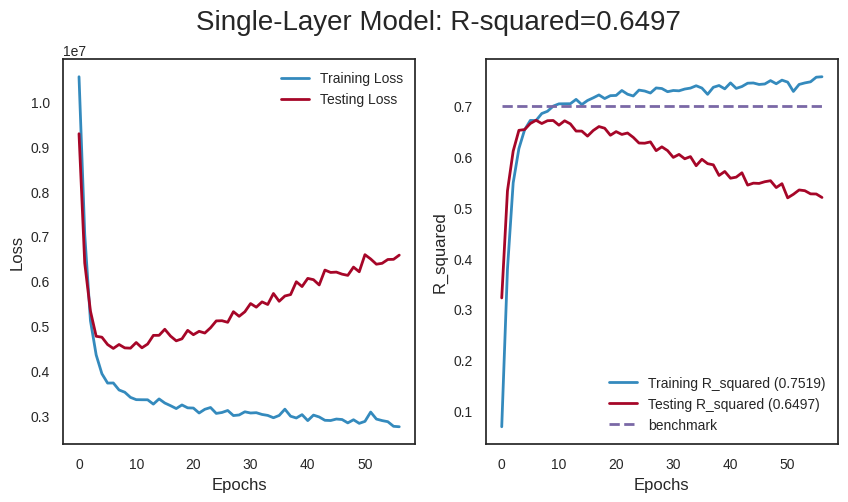

In [ ]:
# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

fig.suptitle(f"Single-Layer Model: R-squared={models[0][3]:.4f}", fontsize=20)


num_epochs = len(model_single_hist.history['loss'])
# Plot loss
axs[0].plot(model_single_hist.history['loss'], label='Training Loss')
axs[0].plot(model_single_hist.history['val_loss'], label='Testing Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()


# Plot r_squared
axs[1].plot(model_single_hist.history['r_squared'], label=f'Training R_squared ({models[0][2]:.4f})')
axs[1].plot(model_single_hist.history['val_r_squared'], label=f'Testing R_squared ({models[0][3]:.4f})')
axs[1].plot([0.70 for i in range(num_epochs)], label='benchmark', linestyle='--')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('R_squared')
axs[1].legend()


From the plot above, we can observe a single layer neural network (NN) does not perform satisfactorily the training data and suffers from overfitting as training R-squared and validation R-squared start diverging.

To overcome these issues, we will use Multi-Layer NNs.

# Module 2: Optimization
**Module Objective**: This module is responsible for determining the best combination of hyperparameters to obtain the optimal machine learning model. This includes testing the best architecture for the Multilayer Neural Network, experimenting with different optimizers, and using grid search to determine the best hyperparameters.

---

## 4. **Multilayer Neural Network**

In [67]:
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 12.3 MB/s eta 0:00:00


In [68]:
# imports
# helper libraries
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
# for visualization
import matplotlib.style as style 
import matplotlib.pyplot as plt
# for model building
import tensorflow as tf
from tensorflow.keras import callbacks
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow_addons.metrics import RSquare
from tensorflow.keras import backend

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:
# all the following variables will remain same for all models
# setting the benchmark as 80%
BENCHMARK = 0.8

# defining the input shape
input_shape = (X_train.shape[1],)

# defining callback to use for earlystopping
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=50)

# batch size 
batch_size = 512

## 4.1 Model 1.0: Baseline
We start with three layers since increasing the layers decreases the value of R-squared.
The architecture of the first model is as follows:

*   Number of Layers: 3
*   Number of Neurons in Layer 1: 32
*   Layer 1 Activation: ReLU
*   Number of Neurons in Layer 2: 16
*   Layer 2 Activation: ReLU
*   Number of Neurons in Layer 3: 1
*   Layer 3 Activation: Linear
*   Optimizer: Adam
*   Epochs: 250
*   Loss function: Mean Squared Error
*   Metric: R-squared


In [ ]:
# model architecture
model1 = Sequential([
    Dense(32, input_shape=input_shape, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# model compiliation 
model1.compile(loss='mean_squared_error', optimizer=Adam(0.001), metrics=[RSquare(name='r_squared')])

# model training
model1_hist = model1.fit(X_train, y_train, epochs=250, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)


In [ ]:
# add model to list
_, training_r2 = model1.evaluate(X_train, y_train)
_, testing_r2 = model1.evaluate(X_test, y_test)
models.append([model1, model1_hist, training_r2, testing_r2])

41/41 [==============================] - 0s 2ms/step - loss: 5138754.0000 - r_squared: 0.6248


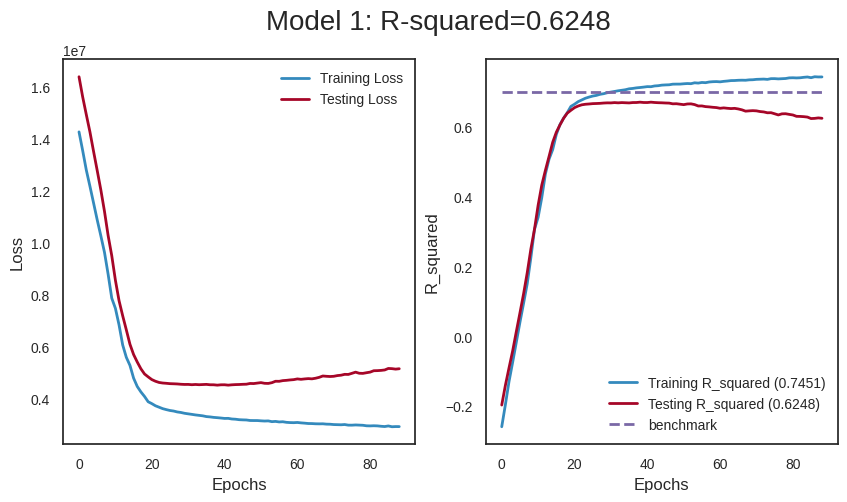

In [ ]:
# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

fig.suptitle(f"Model 1: R-squared={models[1][3]:.4f}", fontsize=20)


num_epochs = len(model1_hist.history['loss'])
# Plot loss
axs[0].plot(model1_hist.history['loss'], label='Training Loss')
axs[0].plot(model1_hist.history['val_loss'], label='Testing Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()


# Plot r_squared
axs[1].plot(model1_hist.history['r_squared'], label=f'Training R_squared ({models[1][2]:.4f})')
axs[1].plot(model1_hist.history['val_r_squared'], label=f'Testing R_squared ({models[1][3]:.4f})')
axs[1].plot([0.70 for i in range(num_epochs)], label='benchmark', linestyle='--')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('R_squared')
axs[1].legend()


## 4.2 MODEL 2.0: Model Architecture
The plots of the baseline model show improvement compared to the single-layer NN but the model is still overfitting the dataset as the values of training R-squared and validation R-squared are diverging. To overcome this issue, we determined the best number of neurons for each layer using grid search. 

The improved model architecture is as follows:
*   Number of Layers: 3
*   Number of Neurons in Layer 1: 8
*   Layer 1 Activation: ReLU
*   Number of Neurons in Layer 2: 8
*   Layer 2 Activation: ReLU
*   Number of Neurons in Layer 3: 1
*   Layer 3 Activation: Linear
*   Optimizer: Adam
*   Epochs: 250
*   Loss function: Mean Squared Error
*   Metric: R-squared 


In [ ]:
# finding best model
layer1 = [8, 16, 24, 32, 64]
models_test = []
r2_list =[0]

for i in layer1:
  for j in layer1:
    print('\n')
    print(f" MODEL, LAYER 1 NEURONS: {i}, LAYER 2 NEURONS: {j}")
    # model architecture
    model = Sequential([
      Dense(i, activation='relu', input_shape=X_train.shape[1:]),
      Dense(j, activation='relu'),
      Dense(1, activation='linear')])
    
    # model compilation
    model.compile(loss='mean_squared_error',optimizer=Adam(0.001), metrics=[RSquare(name='r_squared')])

    # mode training
    history = model.fit(X_train, y_train, epochs=250, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

    # calculating the R-squared
    _, r2 = model.evaluate(X_test, y_test)
    print(f"CURRENT R-SQUARED: {r2}, MAX R-SQUARED: {np.max(r2_list)}")
    r2_list.append(r2)

    models_test.append([model, history])

    backend.clear_session()
    print('SESSION CLEARED')



 MODEL, LAYER 1 NEURONS: 8, LAYER 2 NEURONS: 8
41/41 [==============================] - 0s 2ms/step - loss: 3724390.5000 - r_squared: 0.7280
CURRENT R-SQUARED: 0.7280358076095581, MAX R-SQUARED: 0
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 8, LAYER 2 NEURONS: 16
41/41 [==============================] - 0s 2ms/step - loss: 4431580.5000 - r_squared: 0.6764
CURRENT R-SQUARED: 0.6763949990272522, MAX R-SQUARED: 0.7280358076095581
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 8, LAYER 2 NEURONS: 24
41/41 [==============================] - 0s 2ms/step - loss: 4047741.7500 - r_squared: 0.7044
CURRENT R-SQUARED: 0.7044238448143005, MAX R-SQUARED: 0.7280358076095581
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 8, LAYER 2 NEURONS: 32
41/41 [==============================] - 0s 2ms/step - loss: 3769654.5000 - r_squared: 0.7247
CURRENT R-SQUARED: 0.7247304916381836, MAX R-SQUARED: 0.7280358076095581
SESSION CLEARED


 MODEL, LAYER 1 NEURONS: 8, LAYER 2 NEURONS: 64
41/41 [=============================

**Observation**: the model that gives the best value for testing R-squared is the one with 8 neurons in the first layer and 8 neurons in the second layer. 

In [ ]:
models_test[0][0].summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 80        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# storing the best model
_, training_r2 = models_test[0][0].evaluate(X_train, y_train)
_, testing_r2 = models_test[0][0].evaluate(X_test, y_test)
models.append([models_test[0][0], models_test[0][1], training_r2, testing_r2])

41/41 [==============================] - 0s 5ms/step - loss: 3724390.5000 - r_squared: 0.7280


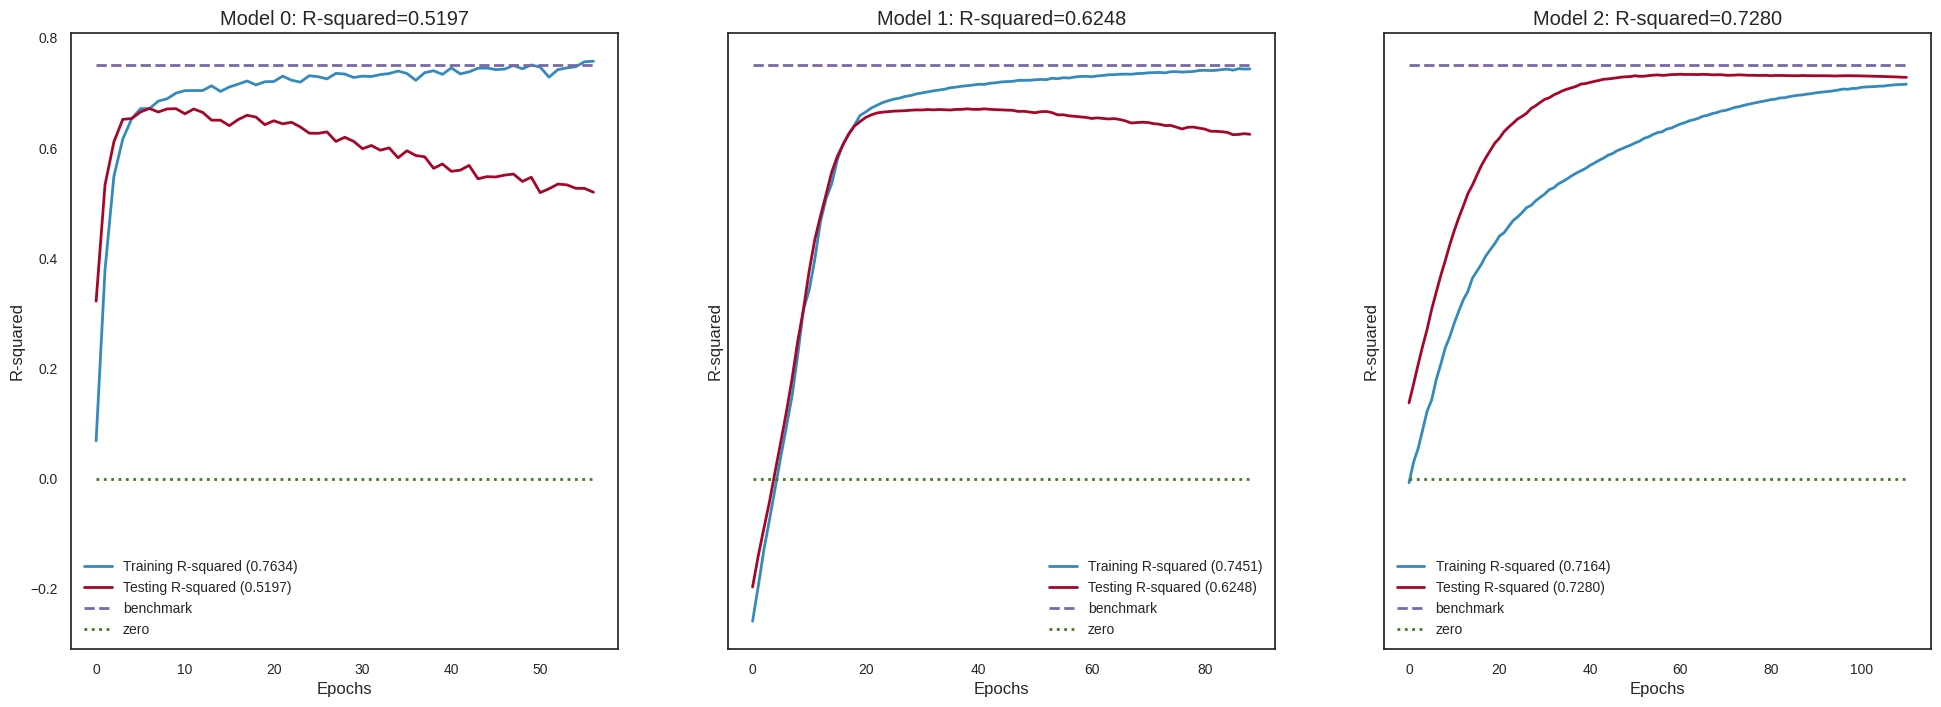

In [ ]:
# comparision of all three models so far

# Create subplots
fig, axs = plt.subplots(nrows=1, ncols=len(models), figsize=(24, 8), sharey=True)

for i in range(len(models)):
    num_epochs = (len(models[i][1].history['r_squared']))

    # Plot r_squared
    axs[i].plot(models[i][1].history['r_squared'], label=f"Training R-squared ({models[i][2]:.4f})")
    axs[i].plot(models[i][1].history['val_r_squared'], label=f"Testing R-squared ({models[i][3]:.4f})")
    axs[i].plot([BENCHMARK-0.05 for i in range(num_epochs)], label='benchmark', linestyle='--')
    axs[i].plot([0 for i in range(num_epochs)], label='zero', linestyle='dotted')
    axs[i].set_xlabel('Epochs')
    axs[i].set_ylabel('R-squared')
    axs[i].set_title(f"Model {i}: R-squared={models[i][3]:.4f}")
    axs[i].legend()

## 4.3 MODEL 3.0: Testing Optimizer
From the above plots we can observe that as we increased the number of layers and selected an appropriate number of neurons in each layer, instead of diverging, the training R-squared and validation R-squared are converging. This model appropriately fits the data. However, we will further test whether changing the optimizer will increase the R-squared value or not. 

After testing the model architecture is as follows:
*   Number of Layers: 3
*   Number of Neurons in Layer 1: 8
*   Layer 1 Activation: ReLU
*   Number of Neurons in Layer 3: 8
*   Layer 2 Activation: ReLU
*   Number of Neurons in Layer 5: 1
*   Layer 3 Activation: Linear
*   Optimizer: Adam
*   Epochs: 250
*   Loss function: Mean Squared Error
*   Metric: R-squared 



In [ ]:
backend.clear_session()

# add dropout layer with rate=0.3
rmsprop_model = Sequential([
    Dense(8, input_shape=input_shape, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

# model compilation
rmsprop_model.compile(loss='mean_squared_error', optimizer=RMSprop(0.001), metrics=[RSquare(name='r_squared')])

# model training
rmsprop_model_hist = rmsprop_model.fit(X_train, y_train, epochs=250, batch_size=batch_size, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=0)

In [ ]:
_, training_r2 = rmsprop_model.evaluate(X_train, y_train)
_, testing_r2 = rmsprop_model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 2ms/step - loss: 3979474.0000 - r_squared: 0.7094


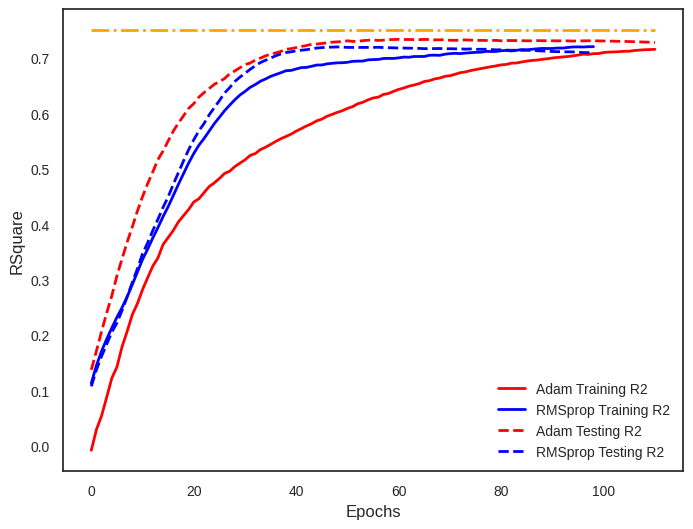

In [ ]:
# visualize the difference between Adam and RMSprop
plt.figure(figsize=(8, 6))

epochs = len(models[2][1].history['r_squared']) if len(models[2][1].history['r_squared']) > len(rmsprop_model_hist.history['r_squared']) else len(rmsprop_model_hist.history['r_squared'])


plt.plot(models[2][1].history['r_squared'],label='Adam Training R2',c='red',linestyle='-')
plt.plot(rmsprop_model_hist.history['r_squared'],label='RMSprop Training R2',c='blue',linestyle='-')
plt.plot(models[2][1].history['val_r_squared'],label='Adam Testing R2',c='red',linestyle='--')
plt.plot(rmsprop_model_hist.history['val_r_squared'],label='RMSprop Testing R2', c='blue',linestyle='--')
plt.plot([BENCHMARK-0.05 for i in range(epochs)], c='orange',linestyle='-.')
plt.xlabel('Epochs')
plt.ylabel('RSquare')
plt.legend()

**Observation**: From the plot we can clearly see that Adam optimizer performs better than RMSprop optimizer. Hence the final model will use Adam.

## 4.4 Model 4.0: Feature Engineering

Model 3.0 gives satisfactory predictions. However, to further improve the model we will try feature engineering using correlation plots. In the following section, we will drop any feature with a correlation factor less than 0.6 and observe the effect.

In [ ]:
# function to drop the columns with correlation factor less than 0.6 to the target variable 
# and split the dataset into training and testing samples
def feature_engineering(df_orders, interval):
  # create dataset
  dataset = create_CLTV_dataset(df_orders,interval)

  # correlation matrix
  corr_matrix = dataset.corr()
  
  # get the target var
  target_var = "CLTV_"+str(12//interval)
  
  # get columns that have correlation more than 0.6 with CLTV4
  corr_columns = []
  for i in corr_matrix.columns:
    if corr_matrix[i][target_var]>0.6:
      corr_columns.append(i)

  # get subset
  dataset = dataset[corr_columns]

  # return after train tets split
  return train_test_split(dataset.drop([target_var],axis=1), dataset[target_var], random_state=2, test_size=0.25)

In [ ]:
dataset2 = feature_engineering(df_orders, 3)
X_train2, X_test2, y_train2, y_test2 = dataset2

In [ ]:
# only the sum columns are left in the dataset
X_train2.describe()

,sales_sum_group1,sales_sum_group2,sales_sum_group3
count,3222.000000,3222.000000,3222.000000
mean,375.012294,396.100680,451.611561
std,2227.334398,1725.622445,2561.159882
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,287.507500,363.702500,350.390000
max,77183.600000,52847.100000,65895.120000


In [ ]:
backend.clear_session()

# training model with the new data
fe_model = Sequential([
    Dense(8, input_shape=X_train2.shape[1:], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])

# model compilation
fe_model.compile(loss='mean_squared_error', optimizer=Adam(0.001), metrics=[RSquare(name='r_squared')])

# model training
fe_model_hist = fe_model.fit(X_train2, y_train2, epochs=250, batch_size=batch_size, validation_data=(X_test2, y_test2), callbacks=[early_stop], verbose=0)

Text(0.5, 1.0, 'Effect of Feature Engineering')

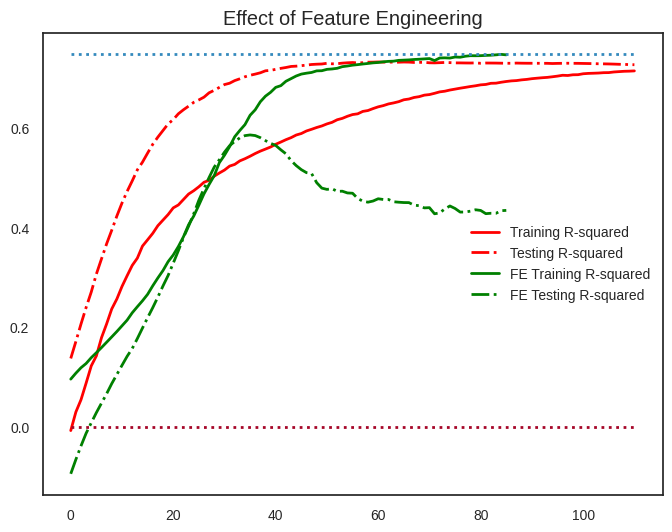

In [ ]:
# plot to compare model before and after feature engineering

plt.figure(figsize=(8, 6))

epochs = len(models[2][1].history['r_squared']) if len(models[2][1].history['r_squared']) > len(fe_model_hist.history['r_squared']) else len(fe_model_hist.history['r_squared'])


# RMSPROP
plt.plot(models[2][1].history['r_squared'], color='red', label='Training R-squared')
plt.plot(models[2][1].history['val_r_squared'], color='red', label='Testing R-squared', linestyle='-.')
plt.plot(fe_model_hist.history['r_squared'], color='green', label='FE Training R-squared')
plt.plot(fe_model_hist.history['val_r_squared'], color='green', label='FE Testing R-squared', linestyle='-.')
plt.plot([BENCHMARK-0.05 for i in range(epochs)], linestyle='dotted')
plt.plot([0 for i in range(epochs)], linestyle='dotted')
plt.legend()
plt.title("Effect of Feature Engineering")


**Observation**: Hence we can see Feature engineering did not help with the R-sqaured value. 

## 5. **Save Model**
In this section we will retrain the bets architecture on the entire dataset and save the final trained in a HDF5 file so that it can be used to make predictions.  

In [69]:
# retrain the model
final_model = Sequential([
    Dense(8, input_shape=X.shape[1:], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='linear')
])
final_model.compile(loss='mean_squared_error', optimizer=Adam(0.001))
final_hist = final_model.fit(X, y, epochs=250)

Epoch 1/250
135/135 [==============================] - 7s 3ms/step - loss: 9733833.0000
Epoch 2/250
135/135 [==============================] - 0s 3ms/step - loss: 8661657.0000
Epoch 3/250
135/135 [==============================] - 0s 3ms/step - loss: 7649149.5000
Epoch 4/250
135/135 [==============================] - 0s 3ms/step - loss: 6707656.0000
Epoch 5/250
135/135 [==============================] - 0s 3ms/step - loss: 5905860.0000
Epoch 6/250
135/135 [==============================] - 0s 3ms/step - loss: 5296948.5000
Epoch 7/250
135/135 [==============================] - 0s 3ms/step - loss: 4918101.0000
Epoch 8/250
135/135 [==============================] - 0s 3ms/step - loss: 4533217.0000
Epoch 9/250
135/135 [==============================] - 0s 3ms/step - loss: 4306903.5000
Epoch 10/250
135/135 [==============================] - 0s 3ms/step - loss: 4120069.0000
Epoch 11/250
135/135 [==============================] - 0s 3ms/step - loss: 3888461.7500
Epoch 12/250
135/135 [========

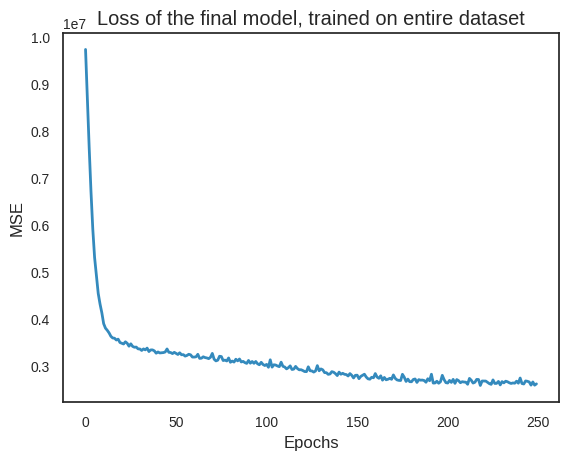

In [71]:
# plot final hist
plt.plot(final_hist.history['loss'])
plt.title("Loss of the final model, trained on entire dataset")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.show()

In [70]:
# save the entire model to a HDF5 file.
# the '.h5' extension indicates that the model should be saved to HDF5.
final_model.save('final_model.h5')

In [ ]:
# tp recreate the exact same model, including its weights and the optimizer
# run the following code
new_model = tf.keras.models.load_model('my_model.h5')
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 80        
                                                                 
 dense_8 (Dense)             (None, 8)                 72        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


## 6. **Conclusion**
The Model 3.0 is our final model. The architecture of the final model is as follows:
*   Number of Layers: 3
*   Number of Neurons in Layer 1: 8
*   Layer 1 Activation: ReLU
*   Number of Neurons in Layer 3: 8
*   Layer 2 Activation: ReLU
*   Number of Neurons in Layer 5: 1
*   Layer 3 Activation: Linear
*   Optimizer: Adam
*   Epochs: 250
*   Loss function: Mean Squared Error
*   Metric: R-squared 

After the process of hypertuning, we were unable to reach our benchmark of 0.8, but were able to achieve a satisfactory R-squared value of 0.728. The primary reason we were unable to achieve a higher value was due to the data being too noisy and unpredictable. 

In the future we could try using more advanced Machine Learning algorithms to further optimize the outcome.


### **Scatterplot**:

In [ ]:
# making predictions
y_pred = final_model.predict(X_test).ravel()

41/41 [==============================] - 0s 2ms/step


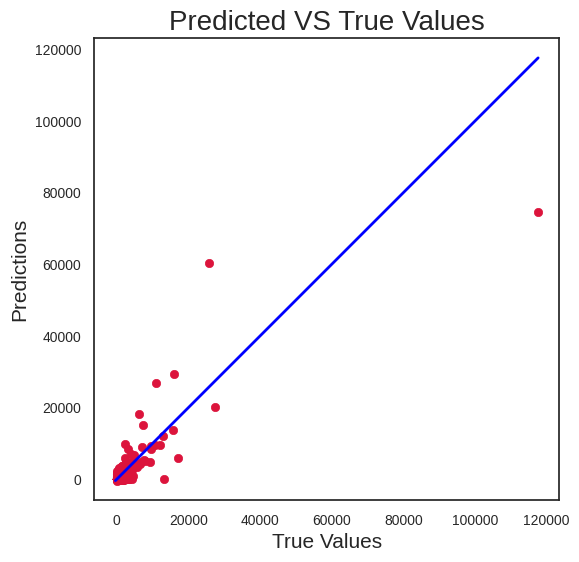

In [ ]:
# VISUALIZATION 
# predicted vs test values
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, c='crimson')
plt.title("Predicted VS True Values", fontsize=20)

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

The x-axis is the actual values and the y-axis represents the predicted values. The closer the dots are located to the straight diagonal line, the better predictions are.
From the above graph we can observe that the predictions and true values lie close to the diagonal with the exception of some data points, indicating the model we have trained is satisfactory.


### **Summary**

We predicted 3-month CLTV for customers of online retail using a Multi-Layer NN.R-squared value for the test set is 0.728, which is satisfactory and it is a good benchmark to try other advanced regression models. This knowledge of CLTV will enable us to formulate strategies with a positive ROI and make informed decisions regarding the investment in customer acquisition and retention.